# 1. 필요 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rc('font',family='Malgun Gothic')
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. 데이터 불러오기

In [3]:
rental_2019 = pd.read_csv('G:/공유 드라이브/빅분기C조/ju_notes/data/#4. 공공자전거_대여이력_정보/rental_data_2019.csv', encoding='cp949')

In [4]:
rental_2019.head()

,Unnamed: 0,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,rental_distance
0,0,SPB-10632,2019-01-01 00:00:44,1421,신내역 4번출구,3,2019-01-01 00:03:53,1420,신내어울공원 앞,13,2,580.0
1,1,SPB-10957,2019-01-01 00:02:16,1408,먹골역 6번출구 앞,3,2019-01-01 00:07:07,1433,중화역 2번출구,4,4,1020.0
2,2,SPB-16067,2019-01-01 00:04:12,347,동대문역사문화공원역 9번출구 앞,17,2019-01-01 00:07:07,387,훈련원공원주차장 앞,1,2,550.0
3,3,SPB-17170,2019-01-01 00:03:09,615,용두동 래미안허브리츠아파트 앞,4,2019-01-01 00:07:27,612,시립동부병원 앞 사거리,14,3,700.0
4,4,SPB-14130,2019-01-01 00:01:44,1177,수명중?고교,7,2019-01-01 00:08:09,1152,마곡역교차로,1,5,1090.0


In [5]:
rental_2019.tail()

,Unnamed: 0,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,rental_distance
18485948,18485948,SPB-18675,2019-12-31 23:38:14,430,KEB하나은행 장충동지점,5,2020-01-01 01:58:18,430,KEB하나은행 장충동지점,7,135,3770.0
18485949,18485949,SPB-13564,2019-12-31 16:08:16,1673,노원역?5번출구,6,2020-01-01 02:32:10,1636,백병원 사거리 농협은행 앞,8,623,620.0
18485950,18485950,SPB-11208,2019-12-31 21:11:33,2307,압구정 한양 3차 아파트,5,2020-01-01 02:47:59,3534,건대입구역 5번출구 뒤,6,80,3820.0
18485951,18485951,SPB-23946,2019-12-31 23:59:58,327,낙원상가 옆,1,2020-01-01 03:02:20,327,낙원상가 옆,1,174,11890.0
18485952,18485952,SPB-17909,2019-12-31 20:11:43,500,어린이대공원역 3번출구 앞,9,2020-01-01 11:00:47,3542,래미안 구의파크 스위트,9,8,1510.0


In [6]:
# unnamed: 0 컬럼은 인덱스와 동일하므로 삭제
rental_2019.drop('Unnamed: 0', axis=1, inplace=True)

# 3. 데이터 요약 정보 확인

In [6]:
# 데이터프레임의 크기(행, 열)
rental_2019.shape

(18485953, 11)

In [7]:
# 데이터프레임의 기본 정보
# null 값 없음
rental_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18485953 entries, 0 to 18485952
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bike_no          object 
 1   rental_date      object 
 2   rental_loc_no    int64  
 3   rental_loc_name  object 
 4   rental_rack      int64  
 5   return_date      object 
 6   return_loc_no    int64  
 7   return_loc_name  object 
 8   return_rack      int64  
 9   rental_time      int64  
 10  rental_distance  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.5+ GB


In [8]:
rental_2019.isnull().sum()

bike_no            0
rental_date        0
rental_loc_no      0
rental_loc_name    0
rental_rack        0
return_date        0
return_loc_no      0
return_loc_name    0
return_rack        0
rental_time        0
rental_distance    0
dtype: int64

In [9]:
# 데이터프레임의 기술 정보 통계 요약
rental_2019.describe()

,rental_loc_no,rental_rack,return_loc_no,return_rack,rental_time,rental_distance
count,1.848595e+07,1.848595e+07,1.848595e+07,1.848595e+07,1.848595e+07,1.848595e+07
mean,1.220311e+03,7.009979e+00,1.219436e+03,6.958919e+00,2.585844e+01,3.837191e+03
std,1.188694e+03,5.253064e+00,1.089149e+03,5.243155e+00,2.871797e+01,6.615086e+03
min,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.020000e+02,3.000000e+00,5.030000e+02,3.000000e+00,8.000000e+00,1.130000e+03
50%,1.150000e+03,6.000000e+00,1.150000e+03,6.000000e+00,1.500000e+01,2.100000e+03
75%,1.833000e+03,1.000000e+01,1.827000e+03,1.000000e+01,3.400000e+01,4.300000e+03
max,9.999900e+04,4.000000e+01,9.999900e+04,4.000000e+01,5.940000e+03,2.559900e+05


In [10]:
rental_2019[['rental_time', 'rental_distance']].describe()

,rental_time,rental_distance
count,1.848595e+07,1.848595e+07
mean,2.585844e+01,3.837191e+03
std,2.871797e+01,6.615086e+03
min,0.000000e+00,0.000000e+00
25%,8.000000e+00,1.130000e+03
50%,1.500000e+01,2.100000e+03
75%,3.400000e+01,4.300000e+03
max,5.940000e+03,2.559900e+05


In [11]:
# 데이터 unique값 확인
rental_2019.nunique()

bike_no               22846
rental_date        11962766
rental_loc_no          1564
rental_loc_name        1586
rental_rack              40
return_date        11970153
return_loc_no          1565
return_loc_name        1587
return_rack              40
rental_time            1091
rental_distance       15992
dtype: int64

In [12]:
# 문자형 describe
rental_2019.describe(include=np.object)

,bike_no,rental_date,rental_loc_name,return_date,return_loc_name
count,18485953,18485953,18485953,18485953,18485953
unique,22846,11962766,1586,11970153,1587
top,SPB-19776,2019-05-22 18:11:21,뚝섬유원지역 1번출구 앞,2019-06-13 08:31:36,뚝섬유원지역 1번출구 앞
freq,1776,15,102117,18,113867


# 4. 대여소별 대여/반납 현황

In [13]:
print('# 대여소 수')
print('대여 대여소: ', rental_2019['rental_loc_no'].nunique())
print('반납 대여소: ', rental_2019['return_loc_no'].nunique())

# 대여소 수
대여 대여소:  1564
반납 대여소:  1565


In [14]:
# 대여량이 많은 상위 대여소
rental_2019['rental_loc_name'].value_counts().head(10)

뚝섬유원지역 1번출구 앞              102117
여의나루역 1번출구 앞               100733
홍대입구역 2번출구 앞                71877
롯데월드타워(잠실역2번출구 쪽)           71099
봉림교 교통섬                     70000
고속터미널역 8-1번, 8-2번 출구 사이     66097
건대입구역 사거리(롯데백화점)            60100
마곡나루역 5번출구 뒤편               54597
안암로터리 버스정류장 앞               54307
마포구민체육센터 앞                  53299
Name: rental_loc_name, dtype: int64

In [15]:
# 반납량이 많은 상위 대여소
rental_2019['return_loc_name'].value_counts().head(10)

뚝섬유원지역 1번출구 앞              113867
여의나루역 1번출구 앞                98017
홍대입구역 2번출구 앞                86321
롯데월드타워(잠실역2번출구 쪽)           71469
봉림교 교통섬                     71395
고속터미널역 8-1번, 8-2번 출구 사이     69998
건대입구역 사거리(롯데백화점)            62895
마포구민체육센터 앞                  61739
안암로터리 버스정류장 앞               60610
마곡나루역 5번출구 뒤편               56363
Name: return_loc_name, dtype: int64

1. 대여반납이 많은 상위 대여소인 뚝섬유원지역, 여의나루역, 홍대입구역, 롯데월드타워, 봉림교 교통섬, 전부 강이나 호수를 인근에 두고 있음

In [16]:
# 평균 이용거리 긴 상위 대여소
rental_2019.groupby(['rental_loc_name'])['rental_distance'].mean().reset_index().sort_values(by='rental_distance', ascending=False).head(10)

,rental_loc_name,rental_distance
873,석수역1번출구 앞 (SK주유소),10064.119542
449,동작역 5번출구 동작주차공원,9374.876296
1582,흑석역 1번출구,8713.522288
421,독산보도육교 앞 자전거 보관소,8570.317961
1508,한남나들목 입구,8270.120528
1179,옥수역 3번출구,8267.099997
1573,황금내근린공원,8237.547233
1541,현대고등학교 건너편,8057.365902
592,문정·가락 대여소 앞,7981.502193
1507,한남 유수지 복개주차장,7957.426537


In [17]:
# 평균 이동거리가 긴 석수역1번출구 앞 (SK주유소)에서 대여한 자전거의 반납 장소 확인
rental_2019.loc[rental_2019['rental_loc_name'] == '석수역1번출구 앞 (SK주유소)', 'return_loc_name']

5413                 아크로리버뷰 부지 앞
6333           석수역1번출구 앞 (SK주유소)
10973       홈플러스 시흥점 맞은편 다비치안경 앞
23348                서울 시흥동우체국 앞
30928               양평우림 이비즈센타 앞
                    ...         
18405607             서울 시흥동우체국 앞
18405969    홈플러스 시흥점 맞은편 다비치안경 앞
18406827                신동아아파트 앞
18416729                   당산육갑문
18468568             서울 시흥동우체국 앞
Name: return_loc_name, Length: 2794, dtype: object

In [18]:
# 평균 이용거리가 긴 상위 반납 대여소
rental_2019.groupby(['return_loc_name'])['rental_distance'].mean().reset_index().sort_values(by='rental_distance', ascending=False).head(10)

,return_loc_name,rental_distance
873,석수역1번출구 앞 (SK주유소),9744.272374
449,동작역 5번출구 동작주차공원,9462.356461
421,독산보도육교 앞 자전거 보관소,8824.548671
227,구룡마을 입구(개포1단지아파트),8707.815534
408,도봉산광역환승센터앞,8630.747315
1574,황금내근린공원,8457.679919
791,서빙고동 주민센터 앞,8360.478351
1438,청계천 생태교실 앞,8359.521009
1583,흑석역 1번출구,8345.131583
1112,여의도중학교 옆,8331.270390


In [19]:
# 평균 이용거리가 짧은 대여소
rental_2019.groupby(['rental_loc_name'])['rental_distance'].mean().reset_index().sort_values(by='rental_distance', ascending=True).head()

,rental_loc_name,rental_distance
966,시스템관리팀,0.000000
965,시설2,0.000000
754,상암단말정비,37.500000
846,서울연신중학교,1733.516572
178,공항초등학교건너편,1770.006141


In [20]:
# 평균 이용시간이 많은 상위 대여소
rental_2019.groupby(['rental_loc_name'])['rental_time'].mean().reset_index().sort_values(by='rental_time', ascending=False).head()

,rental_loc_name,rental_time
449,동작역 5번출구 동작주차공원,59.504354
873,석수역1번출구 앞 (SK주유소),55.688976
820,서울숲 관리사무소,55.316963
1541,현대고등학교 건너편,52.284708
1112,여의도중학교 옆,51.919325


In [21]:
# 평균 이용시간이 적은 상위 대여소
rental_2019.groupby(['rental_loc_name'])['rental_time'].mean().reset_index().sort_values(by='rental_time', ascending=True).head()

,rental_loc_name,rental_time
1256,은평뉴타운 상림마을 13단지,9.050203
754,상암단말정비,10.000000
966,시스템관리팀,10.000000
965,시설2,10.250000
917,세종대학교(학술정보원),10.833333


# 5. 시계열 데이터 확인

In [22]:
rental_2019.head(1)

,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,rental_distance
0,SPB-10632,2019-01-01 00:00:44,1421,신내역 4번출구,3,2019-01-01 00:03:53,1420,신내어울공원 앞,13,2,580.0


## 5.1 rental_date/return_date를 datetime 형으로 변환하고, 년/월/일/시간/오전오후/요일 분리

In [23]:
rental_2019['rental_date'] = pd.to_datetime(rental_2019['rental_date'])
rental_2019['return_date'] = pd.to_datetime(rental_2019['return_date'])
rental_2019.dtypes

bike_no                    object
rental_date        datetime64[ns]
rental_loc_no               int64
rental_loc_name            object
rental_rack                 int64
return_date        datetime64[ns]
return_loc_no               int64
return_loc_name            object
return_rack                 int64
rental_time                 int64
rental_distance           float64
dtype: object

In [24]:
rental_2019['rental_YMD'] = rental_2019['rental_date'].dt.date
rental_2019['rental_year'] = rental_2019['rental_date'].dt.year
rental_2019['rental_month'] = rental_2019['rental_date'].dt.month
rental_2019['rental_day'] = rental_2019['rental_date'].dt.day
rental_2019['rental_hour'] = rental_2019['rental_date'].dt.hour
rental_2019['rental_minute'] = rental_2019['rental_date'].dt.minute
rental_2019['rental_dow'] = rental_2019['rental_date'].dt.dayofweek
rental_2019['rental_AM/PM'] = ['AM' if i < 12 else 'PM' for i in rental_2019['rental_hour']]

rental_2019['return_YMD'] = rental_2019['return_date'].dt.date
rental_2019['return_year'] = rental_2019['return_date'].dt.year
rental_2019['return_month'] = rental_2019['return_date'].dt.month
rental_2019['return_day'] = rental_2019['return_date'].dt.day
rental_2019['return_hour'] = rental_2019['return_date'].dt.hour
rental_2019['return_minute'] = rental_2019['return_date'].dt.minute
rental_2019['return_dow'] = rental_2019['return_date'].dt.dayofweek
rental_2019['return_AM/PM'] = ['AM' if i < 12 else 'PM' for i in rental_2019['return_hour']]

rental_2019 = rental_2019[['bike_no', 'rental_date','Rent_Hour', 
                           'Rent_AM/PM', 'Rent_dayofweek', 'rental_loc_no', 'rental_loc_name',
                           'rental_rack', 'return_date', 'Return_Hour', 
                           'Return_AM/PM', 'Return_dayofweek', 'return_loc_no', 'return_loc_name',
                           'return_rack', 'rental_time', 'rental_distance']]

In [25]:
rental_2019.head()

,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,...,rental_dow,rental_AM/PM,return_YMD,return_year,return_month,return_day,return_hour,return_minute,return_dow,return_AM/PM
0,SPB-10632,2019-01-01 00:00:44,1421,신내역 4번출구,3,2019-01-01 00:03:53,1420,신내어울공원 앞,13,2,...,1,AM,2019-01-01,2019,1,1,0,3,1,AM
1,SPB-10957,2019-01-01 00:02:16,1408,먹골역 6번출구 앞,3,2019-01-01 00:07:07,1433,중화역 2번출구,4,4,...,1,AM,2019-01-01,2019,1,1,0,7,1,AM
2,SPB-16067,2019-01-01 00:04:12,347,동대문역사문화공원역 9번출구 앞,17,2019-01-01 00:07:07,387,훈련원공원주차장 앞,1,2,...,1,AM,2019-01-01,2019,1,1,0,7,1,AM
3,SPB-17170,2019-01-01 00:03:09,615,용두동 래미안허브리츠아파트 앞,4,2019-01-01 00:07:27,612,시립동부병원 앞 사거리,14,3,...,1,AM,2019-01-01,2019,1,1,0,7,1,AM
4,SPB-14130,2019-01-01 00:01:44,1177,수명중?고교,7,2019-01-01 00:08:09,1152,마곡역교차로,1,5,...,1,AM,2019-01-01,2019,1,1,0,8,1,AM


In [26]:
rental_2019.groupby('rental_hour')['rental_loc_name'].value_counts()

rental_hour  rental_loc_name    
0            봉림교 교통섬                3955
             뚝섬유원지역 1번출구 앞          3182
             여의나루역 1번출구 앞           3066
             안암로터리 버스정류장 앞          2337
             홍대입구역 2번출구 앞           2035
                                    ... 
23           명지대학교 학생회관                3
             세종대학교(학술정보원)              2
             개포래미안포레스트아파트 107동 앞       1
             능안마을입구                    1
             영남주차장 정비센터                1
Name: rental_loc_name, Length: 37819, dtype: int64

In [27]:
rental_loc_2019 = rental_2019[['rental_loc_no', 'rental_loc_name']]

In [28]:
rental_loc_2019

,rental_loc_no,rental_loc_name
0,1421,신내역 4번출구
1,1408,먹골역 6번출구 앞
2,347,동대문역사문화공원역 9번출구 앞
3,615,용두동 래미안허브리츠아파트 앞
4,1177,수명중?고교
...,...,...
18485948,430,KEB하나은행 장충동지점
18485949,1673,노원역?5번출구
18485950,2307,압구정 한양 3차 아파트
18485951,327,낙원상가 옆


### 출근 시간(7<= x < 10)

In [29]:
criteria = (rental_2019['rental_hour'] >=7) & (rental_2019['rental_hour'] < 10) 

In [30]:
gotowork = rental_2019[criteria].groupby('rental_loc_name')['rental_hour'].value_counts().unstack()
gotowork['total'] = gotowork.sum(axis=1)

In [31]:
A = rental_2019.groupby('rental_loc_name')['rental_hour'].value_counts().unstack()
gotowork['total_24hour'] = A.sum(axis=1)
gotowork['ratio'] = gotowork['total'] / gotowork['total_24hour']
gotowork_top300 = gotowork.sort_values(by=['ratio'], ascending=False).head(300)
gotowork_top300.head()

rental_hour,7,8,9,total,total_24hour,ratio
rental_loc_name,,,,,,
우솔초등학교 맞은편,491.0,809.0,213.0,1513.0,3145.0,0.481081
주공14단지,477.0,543.0,285.0,1305.0,2717.0,0.480309
LH서초3단지 301동 맞은편,905.0,1362.0,319.0,2586.0,5957.0,0.434111
신내능말공원,1813.0,1392.0,392.0,3597.0,8483.0,0.424025
롯데캐슬골드파크1차 동문,668.0,2879.0,681.0,4228.0,10272.0,0.411604


In [32]:
gotowork_top300_2 = pd.merge(gotowork_top300, rental_loc_2019, left_on = 'rental_loc_name', right_on='rental_loc_name', how='left')
gotowork_top300_2 = gotowork_top300_2.set_index('rental_loc_name')
gotowork_top300_2 = gotowork_top300_2.drop_duplicates()
gotowork_top300_2

,7,8,9,total,total_24hour,ratio,rental_loc_no
rental_loc_name,,,,,,,
우솔초등학교 맞은편,491.0,809.0,213.0,1513.0,3145.0,0.481081,2249
주공14단지,477.0,543.0,285.0,1305.0,2717.0,0.480309,1857
LH서초3단지 301동 맞은편,905.0,1362.0,319.0,2586.0,5957.0,0.434111,2285
신내능말공원,1813.0,1392.0,392.0,3597.0,8483.0,0.424025,1441
롯데캐슬골드파크1차 동문,668.0,2879.0,681.0,4228.0,10272.0,0.411604,1846
...,...,...,...,...,...,...,...
마곡수명산파크3단지 교차로,1996.0,1704.0,1072.0,4772.0,23954.0,0.199215,1167
솔브레인이엔지 뒤편,194.0,611.0,257.0,1062.0,5341.0,0.198839,1840
사당중학교 버스정류소,264.0,183.0,161.0,608.0,3060.0,0.198693,2041


In [33]:
gotowork_top300_2.to_csv('출근시간.csv', encoding='cp949')

### 퇴근 시간(7<= x < 10)

In [34]:
criteria = (rental_2019['rental_hour'] >=5) & (rental_2019['rental_hour'] < 8) 

In [35]:
offwork = rental_2019[criteria].groupby('rental_loc_name')['rental_hour'].value_counts().unstack()
offwork['total'] = offwork.sum(axis=1)

In [36]:
A = rental_2019.groupby('rental_loc_name')['rental_hour'].value_counts().unstack()
offwork['total_24hour'] = A.sum(axis=1)
offwork['ratio'] = offwork['total'] / offwork['total_24hour']
offwork_top300 = offwork.sort_values(by=['ratio'], ascending=False).head(300)
offwork_top300.head()

rental_hour,5,6,7,total,total_24hour,ratio
rental_loc_name,,,,,,
삼일초등학교 인근,201.0,1138.0,1177.0,2516.0,7183.0,0.350271
은평 지웰테라스,10.0,191.0,390.0,591.0,1821.0,0.324547
고덕숲 아이파크 2,16.0,39.0,736.0,791.0,2578.0,0.306827
은평뉴타운 상림마을 13단지,14.0,219.0,348.0,581.0,1972.0,0.294625
신내능말공원,88.0,291.0,1813.0,2192.0,8483.0,0.258399


In [37]:
offwork_top300_2 = pd.merge(offwork_top300, rental_loc_2019, left_on = 'rental_loc_name', right_on='rental_loc_name', how='left')
offwork_top300_2  = offwork_top300_2 .set_index('rental_loc_name')
offwork_top300_2  = offwork_top300_2 .drop_duplicates()
offwork_top300_2 

,5,6,7,total,total_24hour,ratio,rental_loc_no
rental_loc_name,,,,,,,
삼일초등학교 인근,201.0,1138.0,1177.0,2516.0,7183.0,0.350271,2048
은평 지웰테라스,10.0,191.0,390.0,591.0,1821.0,0.324547,969
고덕숲 아이파크 2,16.0,39.0,736.0,791.0,2578.0,0.306827,1062
은평뉴타운 상림마을 13단지,14.0,219.0,348.0,581.0,1972.0,0.294625,968
신내능말공원,88.0,291.0,1813.0,2192.0,8483.0,0.258399,1441
...,...,...,...,...,...,...,...
신사동 성당,100.0,192.0,607.0,899.0,9495.0,0.094681,934
신자초교입구교차로,498.0,752.0,1313.0,2563.0,27262.0,0.094014,504
연희초등학교 앞,17.0,40.0,434.0,491.0,5225.0,0.093971,3107


In [38]:
offwork_top300_2.to_csv('퇴근시간.csv', encoding='cp949')

### 새벽 시간(0<= x < 3)

In [39]:
criteria = (rental_2019['rental_hour'] >=0) & (rental_2019['rental_hour'] < 3) 

In [40]:
dawn = rental_2019[criteria].groupby('rental_loc_name')['rental_hour'].value_counts().unstack()
dawn['total'] = dawn.sum(axis=1)

In [41]:
A = rental_2019.groupby('rental_loc_name')['rental_hour'].value_counts().unstack()
dawn['total_24hour'] = A.sum(axis=1)
dawn['ratio'] = dawn['total'] / dawn['total_24hour']
dawn_top300 = dawn.sort_values(by=['ratio'], ascending=False).head(300)
dawn_top300.head()

rental_hour,0,1,2,total,total_24hour,ratio
rental_loc_name,,,,,,
솔샘역 2번 출구,388.0,455.0,262.0,1105.0,4009.0,0.275630
북한산보국문역,523.0,495.0,412.0,1430.0,5441.0,0.262819
구룡초사거리 (현대아파트10동 앞 ),251.0,396.0,261.0,908.0,3776.0,0.240466
구룡마을 입구 (래미안블레스티지 아파트),286.0,297.0,118.0,701.0,2970.0,0.236027
신영동삼거리,61.0,113.0,162.0,336.0,1438.0,0.233658


In [42]:
dawn_top300_2 = pd.merge(dawn_top300, rental_loc_2019, left_on = 'rental_loc_name', right_on='rental_loc_name', how='left')
dawn_top300_2 = dawn_top300_2.set_index('rental_loc_name')
dawn_top300_2 = dawn_top300_2.drop_duplicates()
dawn_top300_2

,0,1,2,total,total_24hour,ratio,rental_loc_no
rental_loc_name,,,,,,,
솔샘역 2번 출구,388.0,455.0,262.0,1105.0,4009.0,0.275630,1545
북한산보국문역,523.0,495.0,412.0,1430.0,5441.0,0.262819,1357
구룡초사거리 (현대아파트10동 앞 ),251.0,396.0,261.0,908.0,3776.0,0.240466,2358
구룡마을 입구 (래미안블레스티지 아파트),286.0,297.0,118.0,701.0,2970.0,0.236027,2390
신영동삼거리,61.0,113.0,162.0,336.0,1438.0,0.233658,447
...,...,...,...,...,...,...,...
한양대후문역 부근,674.0,513.0,401.0,1588.0,14060.0,0.112945,537
신길선원가와인아파트 앞,427.0,332.0,215.0,974.0,8632.0,0.112836,242
불암고등학교 앞 횡단보도,316.0,312.0,264.0,892.0,7908.0,0.112797,1685


In [43]:
dawn_top300_2.to_csv('새벽시간.csv', encoding='cp949')

## 5.2 월별 대여/반납 현황

In [44]:
rental_2019_month_1 = rental_2019['rental_month'].value_counts().reset_index()
rental_2019_month_1.columns = ['month', 'count']
rental_2019_month_1 = rental_2019_month_1.sort_values('month')
rental_2019_month_1['rent_return'] = '대여'
print(rental_2019_month_1.shape)

rental_2019_month_2 = rental_2019['return_month'].value_counts().reset_index()
rental_2019_month_2.columns = ['month', 'count']
rental_2019_month_2 = rental_2019_month_2.sort_values('month')
rental_2019_month_2['rent_return'] = '반납'
print(rental_2019_month_2.shape)

rental_2019_month = pd.concat([rental_2019_month_1, rental_2019_month_2])
print(rental_2019_month.shape)
rental_2019_month.head()

(12, 3)
(12, 3)
(24, 3)


,month,count,rent_return
10,1,485701,대여
11,2,461972,대여
8,3,885136,대여
7,4,1427767,대여
1,5,2221800,대여


In [45]:
rental_2019_month_pivot =  rental_2019_month.pivot_table(index=['month'],
                                       columns=['rent_return'], 
                                       values='count', aggfunc=sum)
rental_2019_month_pivot

rent_return,대여,반납
month,,
1,485701,485751
2,461972,461753
3,885136,885239
4,1427767,1426893
5,2221800,2221365
6,2215632,2215671
7,2082611,2083911
8,2028698,2026420
9,2007589,2008688


<AxesSubplot:title={'center':'월별 자전거 대여수'}, xlabel='month'>

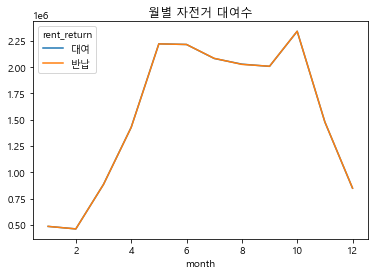

In [46]:
rental_2019_month_pivot.plot(title='월별 자전거 대여수', rot=0)

<AxesSubplot:title={'center':'월별 자전거 대여수'}, xlabel='month'>

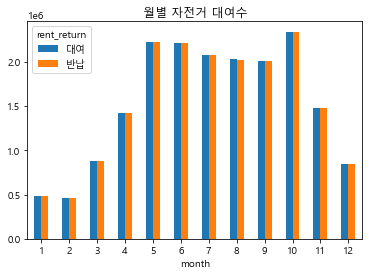

In [47]:
rental_2019_month_pivot.plot.bar(title='월별 자전거 대여수', rot=0)

<AxesSubplot:xlabel='month', ylabel='count'>

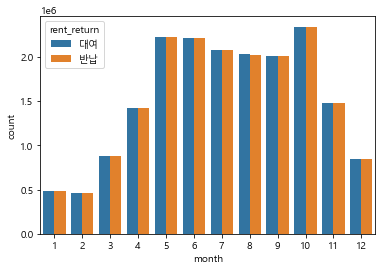

In [48]:
sns.barplot(data=rental_2019_month, x='month', y='count', hue='rent_return')

## 5.3 일자별 대여/반납 현황

In [49]:
rental_2019_day_1 = rental_2019['rental_day'].value_counts().reset_index()
rental_2019_day_1.columns = ['day', 'count']
rental_2019_day_1 = rental_2019_day_1.sort_values('day')
rental_2019_day_1['rent_return'] = '대여'
print(rental_2019_day_1.shape)

rental_2019_day_2 = rental_2019['return_day'].value_counts().reset_index()
rental_2019_day_2.columns = ['day', 'count']
rental_2019_day_2 = rental_2019_day_2.sort_values('day')
rental_2019_day_2['rent_return'] = '반납'
print(rental_2019_day_2.shape)

rental_2019_day = pd.concat([rental_2019_day_1, rental_2019_day_2])
print(rental_2019_day.shape)
rental_2019_day.head()

(31, 3)
(31, 3)
(62, 3)


,day,count,rent_return
5,1,639015,대여
16,2,607693,대여
12,3,617642,대여
18,4,605133,대여
23,5,594168,대여


In [50]:
rental_2019_day_pivot =  rental_2019_day.pivot_table(index=['day'],
                                       columns=['rent_return'], 
                                       values='count', aggfunc=sum)
rental_2019_day_pivot.head()

rent_return,대여,반납
day,,
1,639015,638678
2,607693,609028
3,617642,616318
4,605133,605563
5,594168,594074


<AxesSubplot:title={'center':'일별 자전거 대여수'}, xlabel='day'>

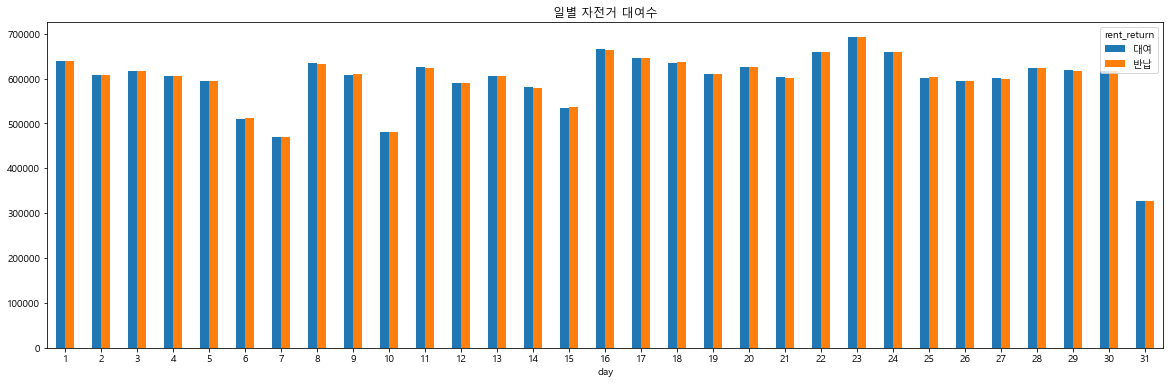

In [51]:
rental_2019_day_pivot.plot.bar(title='일별 자전거 대여수', rot=0, figsize=(20, 6))

<AxesSubplot:xlabel='day', ylabel='count'>

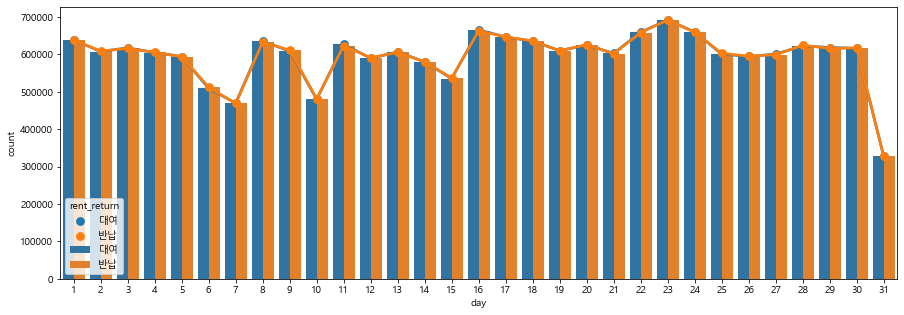

In [52]:
plt.figure(figsize=(15, 5))
sns.pointplot(data=rental_2019_day, x='day', y='count', hue='rent_return')
sns.barplot(data=rental_2019_day, x='day', y='count', hue='rent_return')

In [53]:
rental_2019_ymd_1 = rental_2019['rental_YMD'].value_counts().reset_index()
rental_2019_ymd_1.columns = ['ymd', 'count']
rental_2019_ymd_1 = rental_2019_ymd_1.sort_values('ymd')
rental_2019_ymd_1['rent_return'] = '대여'
print(rental_2019_ymd_1.shape)

rental_2019_ymd_2 = rental_2019['return_YMD'].value_counts().reset_index()
rental_2019_ymd_2.columns = ['ymd', 'count']
rental_2019_ymd_2 = rental_2019_ymd_2.sort_values('ymd')
rental_2019_ymd_2['rent_return'] = '반납'
print(rental_2019_ymd_2.shape)

rental_2019_ymd = pd.concat([rental_2019_ymd_1, rental_2019_ymd_2])
print(rental_2019_ymd.shape)
rental_2019_ymd.head()

(364, 3)
(365, 3)
(729, 3)


,ymd,count,rent_return
361,2019-01-01,8463,대여
341,2019-01-02,14104,대여
329,2019-01-03,16029,대여
324,2019-01-04,16958,대여
350,2019-01-05,12144,대여


In [54]:
# 시간데이터로 표현하기 위해 타입을 바꿔준다.
rental_2019_ymd["ymd"] = pd.to_datetime(rental_2019_ymd["ymd"])
rental_2019_ymd["yymmdd"] = rental_2019_ymd["ymd"].dt.date

<AxesSubplot:xlabel='yymmdd', ylabel='count'>

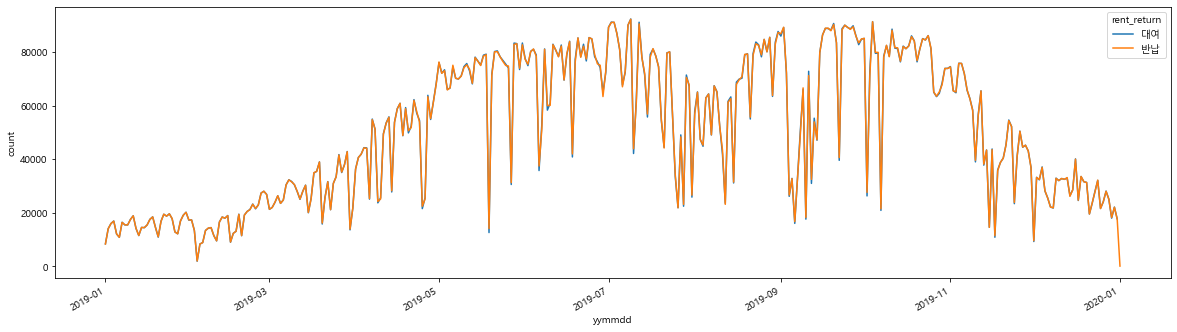

In [55]:
# 특정 기간동안의 따릉이 대여/반납 수
plt.figure(figsize=(20, 5))
plt.xticks(rotation=30, ha='right')
sns.lineplot(data=rental_2019_ymd, x='yymmdd', y='count', hue='rent_return')

In [56]:
rental_2019_ymd = rental_2019_ymd.sort_values(by="ymd")
rental_2019_ymd.head()

,ymd,count,rent_return,yymmdd
361,2019-01-01,8463,대여,2019-01-01
361,2019-01-01,8377,반납,2019-01-01
342,2019-01-02,14086,반납,2019-01-02
341,2019-01-02,14104,대여,2019-01-02
330,2019-01-03,16005,반납,2019-01-03


## 5.4 요일별 대여/반납 현황

In [57]:
rental_2019_dow_1 = rental_2019['rental_dow'].value_counts().reset_index()
rental_2019_dow_1.columns = ['dayofweek', 'count']
rental_2019_dow_1 = rental_2019_dow_1.sort_values('dayofweek')
rental_2019_dow_1['rent_return'] = '대여'
print(rental_2019_dow_1.shape)

rental_2019_dow_2 = rental_2019['return_dow'].value_counts().reset_index()
rental_2019_dow_2.columns = ['dayofweek', 'count']
rental_2019_dow_2 = rental_2019_dow_2.sort_values('dayofweek')
rental_2019_dow_2['rent_return'] = '반납'
print(rental_2019_dow_2.shape)

rental_2019_dow = pd.concat([rental_2019_dow_1, rental_2019_dow_2]).reindex()
print(rental_2019_dow.shape)

(7, 3)
(7, 3)
(14, 3)


In [58]:
rental_2019_dow.head(3)

,dayofweek,count,rent_return
2,0,2735785,대여
0,1,2854261,대여
3,2,2644636,대여


In [59]:
rental_2019_dow.tail(3)

,dayofweek,count,rent_return
2,4,2730685,반납
5,5,2554507,반납
6,6,2352495,반납


In [60]:
weekday_map = {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
rental_2019_dow['weekday'] = rental_2019_dow['dayofweek'].apply(lambda x : weekday_map[x])
rental_2019_dow[['dayofweek', 'weekday']].head()

,dayofweek,weekday
2,0,월
0,1,화
3,2,수
4,3,목
1,4,금


<AxesSubplot:title={'center':'요일별 자전거 대여수'}, xlabel='weekday', ylabel='count'>

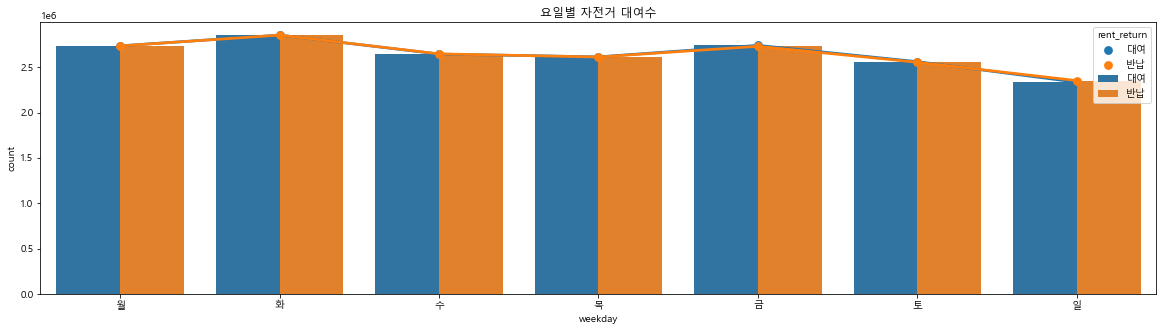

In [61]:
plt.figure(figsize=(20, 5))
plt.title("요일별 자전거 대여수")
sns.pointplot(data=rental_2019_dow, x="weekday", y="count", hue="rent_return")
sns.barplot(data=rental_2019_dow, x="weekday", y="count", hue="rent_return")

## 5.5 시간대별 대여/반납량

In [62]:
rental_2019_hour_1 = rental_2019['rental_hour'].value_counts().reset_index()
rental_2019_hour_1.columns = ['hour', 'count']
rental_2019_hour_1 = rental_2019_hour_1.sort_values('hour')
rental_2019_hour_1['rent_return'] = '대여'
rental_2019_hour_1.head()

rental_2019_hour_2 = rental_2019['return_hour'].value_counts().reset_index()
rental_2019_hour_2.columns = ['hour', 'count']
rental_2019_hour_2 = rental_2019_hour_2.sort_values('hour')
rental_2019_hour_2['rent_return'] = '반납'
rental_2019_hour_2.head()

rental_2019_hour = pd.concat([rental_2019_hour_1, rental_2019_hour_2])
rental_2019_hour.head()

,hour,count,rent_return
15,0,604373,대여
18,1,492873,대여
19,2,347591,대여
21,3,238757,대여
22,4,148171,대여


<AxesSubplot:xlabel='hour', ylabel='count'>

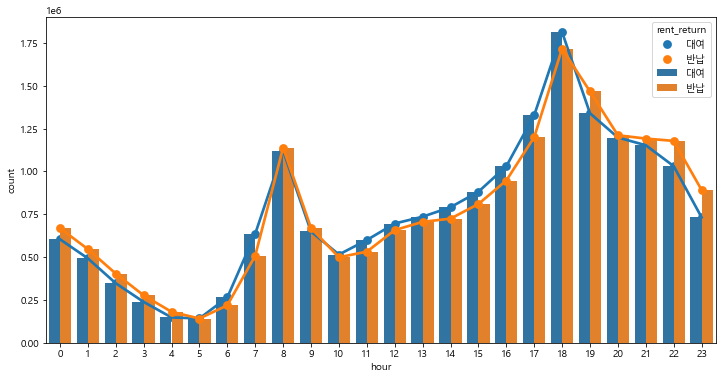

In [63]:
plt.figure(figsize=(12,6))
sns.pointplot(data=rental_2019_hour, x="hour", y="count", hue="rent_return")
sns.barplot(data=rental_2019_hour, x="hour", y="count", hue="rent_return")

- 새벽시간대로 갈 수록 대여/반납 수가 줄어든다.
- 출근시간대에는 대여가 반납보다 많다.
- 오전에는 8시대에 대여/반납이 많으며, 오후시간대에는 18시에 대여/반납이 가장 많다.
- 오전 11시부터 20시까지는 대여가 반납보다 많다.(대여>반납)
- 21시 이후부터 오전 4시까지는 대여보다 반납이 많다.(대여<반납)

In [64]:
rental_2019_minute_1 = rental_2019['rental_minute'].value_counts().reset_index()
rental_2019_minute_1.columns = ['minute', 'count']
rental_2019_minute_1 = rental_2019_minute_1.sort_values('minute')
rental_2019_minute_1['rent_return'] = '대여'
print(rental_2019_minute_1.shape)

rental_2019_minute_2 = rental_2019['return_minute'].value_counts().reset_index()
rental_2019_minute_2.columns = ['minute', 'count']
rental_2019_minute_2 = rental_2019_minute_2.sort_values('minute')
rental_2019_minute_2['rent_return'] = '반납'
print(rental_2019_minute_2.shape)

rental_2019_minute = pd.concat([rental_2019_minute_1, rental_2019_minute_2])
print(rental_2019_minute.shape)

(60, 3)
(60, 3)
(120, 3)


<AxesSubplot:title={'center':'시간대별(분) 자전거 대여/반납수'}, xlabel='minute', ylabel='count'>

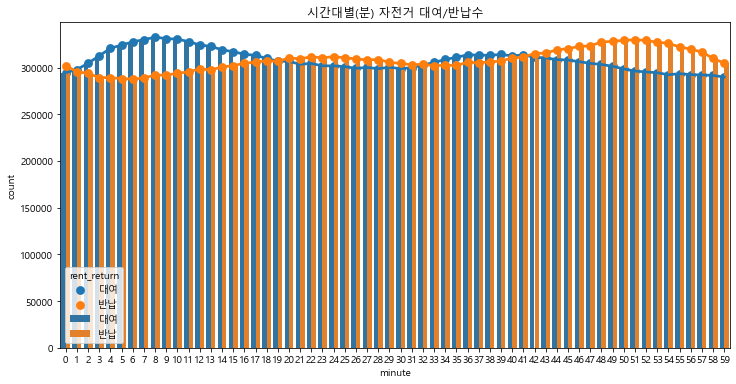

In [65]:
plt.figure(figsize=(12,6))
plt.title('시간대별(분) 자전거 대여/반납수')
sns.pointplot(data=rental_2019_minute, x="minute", y="count", hue="rent_return")
sns.barplot(data=rental_2019_minute, x="minute", y="count", hue="rent_return")

- 1 ~ 18분 사이에 대여가 더 많이 일어나며, 반납은 43~60분 사이에 더 많이 일어남

# 6. 대여와 반납이 같은 곳에 이루어지고 있나?

In [66]:
# 같은대여반납소라는 컬럼을 새로 만들고 대여반납이 같은 곳에서 이루어지고 있는지 여부를 추가한다.
rental_2019['rent_return_same_loc'] = rental_2019['rental_loc_name'] == rental_2019['return_loc_name']

In [67]:
rental_2019_location_diff = rental_2019['rent_return_same_loc'].value_counts().reset_index()
rental_2019_location_diff.columns = ['일치여부', '대여반납수']
# 같은|다른 반납소별로 대여반납수가 몇 배나 차이가 나는지 확인한다.
location_diff_ratio = rental_2019_location_diff['대여반납수'][0]/rental_2019_location_diff['대여반납수'][1]
print(f'같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 {location_diff_ratio:.2f}배 많다.')
rental_2019_location_diff

같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 10.18배 많다.


,일치여부,대여반납수
0,False,16832553
1,True,1653400


<AxesSubplot:title={'center':'대여반납소 일치여부'}, xlabel='일치여부'>

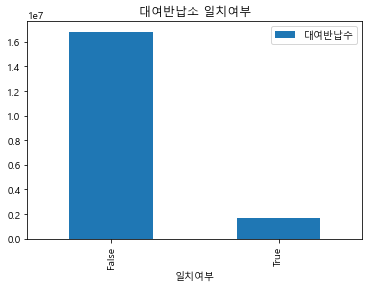

In [68]:
rental_2019_location_diff.set_index('일치여부').plot.bar(title="대여반납소 일치여부")

<AxesSubplot:xlabel='일치여부', ylabel='대여반납수'>

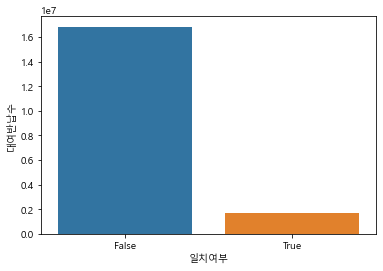

In [69]:
sns.barplot(data=rental_2019_location_diff, x='일치여부', y='대여반납수')

- 같은 곳에서 대여반납을 하는 것보다 다른 대여소에 대여반납 하는 경우가 훨씬 많음

In [70]:
rental_2019_same_loc = rental_2019.loc[rental_2019['rent_return_same_loc'] == True]
rental_2019_same_loc.head()

,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,...,rental_AM/PM,return_YMD,return_year,return_month,return_day,return_hour,return_minute,return_dow,return_AM/PM,rent_return_same_loc
44,SPB-17650,2019-01-01 00:17:06,310,청계광장 옆,4,2019-01-01 00:20:51,310,청계광장 옆,9,3,...,AM,2019-01-01,2019,1,1,0,20,1,AM,True
110,SPB-10386,2019-01-01 00:28:02,2380,삼성동베이직하우스앞,2,2019-01-01 00:32:22,2380,삼성동베이직하우스앞,5,4,...,AM,2019-01-01,2019,1,1,0,32,1,AM,True
123,SPB-17747,2019-01-01 00:29:44,1637,KT 노원점 건물 앞,2,2019-01-01 00:34:13,1637,KT 노원점 건물 앞,6,4,...,AM,2019-01-01,2019,1,1,0,34,1,AM,True
142,SPB-02587,2019-01-01 00:26:33,2355,삼성역 5~6번 출구 사이,9,2019-01-01 00:36:49,2355,삼성역 5~6번 출구 사이,9,9,...,AM,2019-01-01,2019,1,1,0,36,1,AM,True
144,SPB-19267,2019-01-01 00:26:27,2355,삼성역 5~6번 출구 사이,8,2019-01-01 00:37:14,2355,삼성역 5~6번 출구 사이,8,9,...,AM,2019-01-01,2019,1,1,0,37,1,AM,True


In [71]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소(대여|반납 건 수)
rental_2019_same_loc['rental_loc_name'].value_counts().head(30)

뚝섬유원지역 1번출구 앞              27872
여의나루역 1번출구 앞               27388
서울숲 관리사무소                  13456
고속터미널역 8-1번, 8-2번 출구 사이    13025
마포구민체육센터 앞                 12407
봉림교 교통섬                    10342
노들역 1번출구                    8621
옥수역 3번출구                    8490
당산육갑문                       8100
CJ 드림시티                     8025
월드컵공원                       7901
흑석역 1번출구                    7218
동방1교                        6950
몽촌토성역 1번출구 옆                6838
청계천 생태교실 앞                  6655
올림픽공원역 3번출구                 6594
양천향교역 7번출구앞                 6540
한신16차아파트 119동 앞             6482
독산보도육교 앞 자전거 보관소            6418
한성백제역 2번 출구                 5591
응봉역 1번출구                    5567
현대고등학교 건너편                  5523
잠실새내역 5번 출구 뒤               5513
새절역 2번출구                    5262
IFC몰                        5094
망원2빗물펌프장 앞                  4946
아크로리버뷰 부지 앞                 4943
홍대입구역 2번출구 앞                4869
홍은사거리                       4844
잠실나루역 (2번 출구 쪽)             4687
Name: rent

In [143]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소(대여|반납 건 수)
rental_2019_same_loc['rental_loc_name'].value_counts().head(20)

뚝섬유원지역 1번출구 앞              27872
여의나루역 1번출구 앞               27388
서울숲 관리사무소                  13456
고속터미널역 8-1번, 8-2번 출구 사이    13025
마포구민체육센터 앞                 12407
봉림교 교통섬                    10342
노들역 1번출구                    8621
옥수역 3번출구                    8490
당산육갑문                       8100
CJ 드림시티                     8025
월드컵공원                       7901
흑석역 1번출구                    7218
동방1교                        6950
몽촌토성역 1번출구 옆                6838
청계천 생태교실 앞                  6655
올림픽공원역 3번출구                 6594
양천향교역 7번출구앞                 6540
한신16차아파트 119동 앞             6482
독산보도육교 앞 자전거 보관소            6418
한성백제역 2번 출구                 5591
Name: rental_loc_name, dtype: int64

In [146]:
c.pd.DataFrame

AttributeError: 'Series' object has no attribute 'pd'

- 같은 곳에서 대여반납이 이루어지는 곳은 공원, 한강 주변인 것을 확인할 수 있음

In [72]:
rental_2019_same_loc['rental_loc_name'].value_counts().sum()

1653400

In [73]:
((rental_2019_same_loc['rental_loc_name'].value_counts() / rental_2019_same_loc['rental_loc_name'].value_counts().sum()) * 100).head(30)

뚝섬유원지역 1번출구 앞              1.685738
여의나루역 1번출구 앞               1.656465
서울숲 관리사무소                  0.813838
고속터미널역 8-1번, 8-2번 출구 사이    0.787771
마포구민체육센터 앞                 0.750393
봉림교 교통섬                    0.625499
노들역 1번출구                   0.521410
옥수역 3번출구                   0.513487
당산육갑문                      0.489900
CJ 드림시티                    0.485363
월드컵공원                      0.477864
흑석역 1번출구                   0.436555
동방1교                       0.420346
몽촌토성역 1번출구 옆               0.413572
청계천 생태교실 앞                 0.402504
올림픽공원역 3번출구                0.398815
양천향교역 7번출구앞                0.395549
한신16차아파트 119동 앞            0.392041
독산보도육교 앞 자전거 보관소           0.388170
한성백제역 2번 출구                0.338152
응봉역 1번출구                   0.336700
현대고등학교 건너편                 0.334039
잠실새내역 5번 출구 뒤              0.333434
새절역 2번출구                   0.318253
IFC몰                       0.308092
망원2빗물펌프장 앞                 0.299141
아크로리버뷰 부지 앞                0.298960
홍대입구역 2번출구 앞               0

In [75]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소 비율
((rental_2019_same_loc['rental_loc_name'].value_counts() / 
  rental_2019_same_loc['rental_loc_name'].value_counts().sum()) * 100).head(30)

뚝섬유원지역 1번출구 앞              1.685738
여의나루역 1번출구 앞               1.656465
서울숲 관리사무소                  0.813838
고속터미널역 8-1번, 8-2번 출구 사이    0.787771
마포구민체육센터 앞                 0.750393
봉림교 교통섬                    0.625499
노들역 1번출구                   0.521410
옥수역 3번출구                   0.513487
당산육갑문                      0.489900
CJ 드림시티                    0.485363
월드컵공원                      0.477864
흑석역 1번출구                   0.436555
동방1교                       0.420346
몽촌토성역 1번출구 옆               0.413572
청계천 생태교실 앞                 0.402504
올림픽공원역 3번출구                0.398815
양천향교역 7번출구앞                0.395549
한신16차아파트 119동 앞            0.392041
독산보도육교 앞 자전거 보관소           0.388170
한성백제역 2번 출구                0.338152
응봉역 1번출구                   0.336700
현대고등학교 건너편                 0.334039
잠실새내역 5번 출구 뒤              0.333434
새절역 2번출구                   0.318253
IFC몰                       0.308092
망원2빗물펌프장 앞                 0.299141
아크로리버뷰 부지 앞                0.298960
홍대입구역 2번출구 앞               0

# 7. 같은/다른 대여소에서 대여가 되는 자전거의 평균 이용시간

## 7.1 같은 대여반납소

In [76]:
same_loc_mean_time = rental_2019_same_loc['rental_time'].mean()

print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', same_loc_mean_time)

rental_2019_same_mean = rental_2019_same_loc.groupby(['rental_loc_name', 'rental_loc_no', 'return_loc_name'])['rental_time'].mean().reset_index()

rental_2019_same_count = rental_2019_same_loc.groupby(['rental_loc_name', 'rental_loc_no', 'return_loc_name']).size().reset_index()

rental_2019_same_count.columns = ['rental_loc_name', 'rental_loc_no', 'return_loc_name', '이용횟수']

rental_2019_same_loc2 = rental_2019_same_mean.merge(rental_2019_same_count, 
                                                    left_on=['rental_loc_name', 'rental_loc_no', 'return_loc_name'], 
                                                    right_on=['rental_loc_name', 'rental_loc_no', 'return_loc_name'])

rental_2019_same_loc2.sort_values(by='rental_time', ascending=False).head(10)

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  51.328388774646186


,rental_loc_name,rental_loc_no,return_loc_name,rental_time,이용횟수
872,석수역1번출구 앞 (SK주유소),1858,석수역1번출구 앞 (SK주유소),76.172485,487
408,도봉산광역환승센터앞,1703,도봉산광역환승센터앞,75.376847,406
160,"고속터미널역 8-1번, 8-2번 출구 사이",2219,"고속터미널역 8-1번, 8-2번 출구 사이",75.245528,13025
662,복정역 2번출구 후문 (장지치안센터),2607,복정역 2번출구 후문 (장지치안센터),73.593254,504
1557,홍은사거리,117,홍은사거리,72.883154,4844
1215,우리은행 금호동 지점 앞,533,우리은행 금호동 지점 앞,72.417339,496
1004,신반포역 2번출구 앞,2214,신반포역 2번출구 앞,71.770534,1948
6,CJ 드림시티,907,CJ 드림시티,71.581059,8025
795,서울 월드컵 경기장,199,서울 월드컵 경기장,71.399285,839
1060,안골마을입구,2288,안골마을입구,70.566038,53


In [77]:
# 이용횟수가 많은 곳의 평균 이용시간
rental_2019_same_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,rental_loc_name,rental_loc_no,return_loc_name,rental_time,이용횟수
470,뚝섬유원지역 1번출구 앞,502,뚝섬유원지역 1번출구 앞,57.883180,27872
1106,여의나루역 1번출구 앞,207,여의나루역 1번출구 앞,66.495071,27388
819,서울숲 관리사무소,3515,서울숲 관리사무소,58.816662,13456
160,"고속터미널역 8-1번, 8-2번 출구 사이",2219,"고속터미널역 8-1번, 8-2번 출구 사이",75.245528,13025
522,마포구민체육센터 앞,152,마포구민체육센터 앞,58.230918,12407
664,봉림교 교통섬,2102,봉림교 교통섬,55.995455,10342
318,노들역 1번출구,2002,노들역 1번출구,62.616402,8621
1178,옥수역 3번출구,565,옥수역 3번출구,56.817668,8490
364,당산육갑문,272,당산육갑문,61.698889,8100
6,CJ 드림시티,907,CJ 드림시티,71.581059,8025


In [158]:
c = rental_2019_same_loc2.sort_values(by='이용횟수', ascending=False).head(10)
c[['rental_loc_name', '이용횟수', 'rental_time']]

,rental_loc_name,이용횟수,rental_time
470,뚝섬유원지역 1번출구 앞,27872,57.883180
1106,여의나루역 1번출구 앞,27388,66.495071
819,서울숲 관리사무소,13456,58.816662
160,"고속터미널역 8-1번, 8-2번 출구 사이",13025,75.245528
522,마포구민체육센터 앞,12407,58.230918
664,봉림교 교통섬,10342,55.995455
318,노들역 1번출구,8621,62.616402
1178,옥수역 3번출구,8490,56.817668
364,당산육갑문,8100,61.698889
6,CJ 드림시티,8025,71.581059


In [159]:
c = rental_2019_diff_loc2.sort_values(by='이용횟수', ascending=False).head(10)
c[['rental_loc_name', '이용횟수', 'rental_time']]

,rental_loc_name,이용횟수,rental_time
210708,봉림교 교통섬,11311,17.287685
140156,동방1교,10718,16.348106
495697,하늘채코오롱아파트 건너편,8921,10.782648
39793,건국대학교 (입학정보관),8483,8.904633
151117,뚝섬유원지역 1번출구 앞,7396,22.805571
40775,건국대학교 학생회관,7097,9.765112
427268,자양나들목,7037,8.663351
518670,홍대입구역 2번출구 앞,6471,15.626951
428210,자양중앙나들목,5841,8.212977
42032,건대입구역 사거리(롯데백화점),5633,35.286526


<AxesSubplot:ylabel='Frequency'>

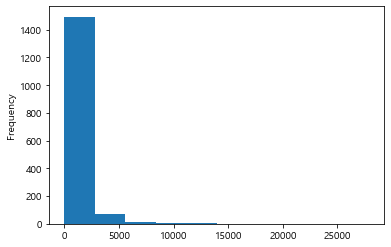

In [78]:
rental_2019_same_loc2['이용횟수'].plot.hist()

<AxesSubplot:xlabel='이용횟수', ylabel='Density'>

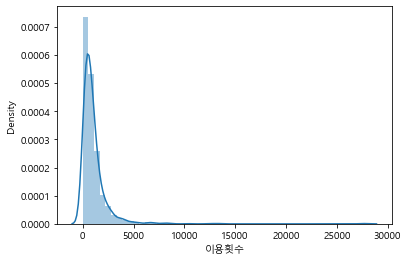

In [79]:
sns.distplot(rental_2019_same_loc2['이용횟수'])

## 7.2 다른 대여/반납소

In [80]:
rental_2019_diff_loc = rental_2019.loc[rental_2019['rent_return_same_loc'] == False]
rental_2019_diff_loc.shape

(16832553, 28)

In [81]:
diff_loc_mean_time = rental_2019_diff_loc['rental_time'].mean()
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', rental_2019_diff_loc['rental_time'].mean())

rental_2019_diff_mean = rental_2019_diff_loc.groupby(
    ['rental_loc_name', 'return_loc_name'])['rental_time'].mean().reset_index()
rental_2019_diff_count = rental_2019_diff_loc.groupby(
    ['rental_loc_name', 'return_loc_name']).size().reset_index()

rental_2019_diff_count.columns = ['rental_loc_name', 'return_loc_name', '이용횟수']
rental_2019_diff_loc2 = rental_2019_diff_mean.merge(rental_2019_diff_count, 
                                  left_on=['rental_loc_name', 'return_loc_name'], 
                                  right_on=['rental_loc_name', 'return_loc_name'])
rental_2019_diff_loc2.sort_values(by='rental_time', ascending=False).head(10)

다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  23.356620115795863


,rental_loc_name,return_loc_name,rental_time,이용횟수
434255,장수공원,궁동생태공원,2866.0,1
153552,래미안라센트아파트 103동 앞,이촌1동 마을공원,1938.0,1
263310,서울숲역 4번 출구 옆,역삼동 디오슈페리움 (우성아파트 사거리),1438.0,1
411390,을지로2가 사거리 남측,송파중학교 정문,1066.0,1
220300,사당역 7번출구쪽,아주중학교건너편,997.0,1
128669,도림천역 1번 출구 앞,석관동주민센터 앞,885.0,1
100162,남태령역 2번출구,두산건설 본사,827.0,1
467350,창신역 1번출구 앞,정릉꿈에그린1단지 201동 앞,818.0,1
48813,"고속터미널역 8-1번, 8-2번 출구 사이",개화산역 2번 출구,674.7,10
200591,방학사거리 (봄마당 앞),신이문역 1번출구,578.0,2


In [82]:
# 이용횟수가 많은 곳의 평균 이용시간
rental_2019_diff_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,rental_loc_name,return_loc_name,rental_time,이용횟수
210708,봉림교 교통섬,동방1교,17.287685,11311
140156,동방1교,봉림교 교통섬,16.348106,10718
495697,하늘채코오롱아파트 건너편,홍대입구역 2번출구 앞,10.782648,8921
39793,건국대학교 (입학정보관),건국대학교 학생회관,8.904633,8483
151117,뚝섬유원지역 1번출구 앞,건대입구역 사거리(롯데백화점),22.805571,7396
40775,건국대학교 학생회관,건국대학교 (입학정보관),9.765112,7097
427268,자양나들목,뚝섬유원지역 1번출구 앞,8.663351,7037
518670,홍대입구역 2번출구 앞,하늘채코오롱아파트 건너편,15.626951,6471
428210,자양중앙나들목,뚝섬유원지역 1번출구 앞,8.212977,5841
42032,건대입구역 사거리(롯데백화점),뚝섬유원지역 1번출구 앞,35.286526,5633


<AxesSubplot:xlabel='이용횟수', ylabel='Density'>

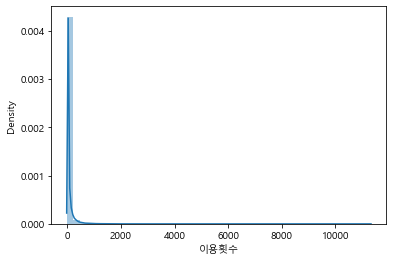

In [83]:
sns.distplot(rental_2019_diff_loc2['이용횟수'])

In [84]:
rent_mean_time = same_loc_mean_time - diff_loc_mean_time
print(f'같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 {rent_mean_time:.2f} 분 많다.')

같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 27.97 분 많다.


- 봉림교 교통섬 <--> 동방1교가 가장 이용횟수가 높은 대여반납소임
- 이용횟수가 많은 대여소라고 평균이용시간이 평균보다 높지는 않음

# 8. 해당 기간동안 가장 많이 이용된 자전거는 몇회 대여 되었을까?

In [7]:
bike_describe = rental_2019['bike_no'].describe()
print('대여된 자전거 수 :', bike_describe[1])
print('가장 많이 대여된 자전거 번호 :', bike_describe[2])
print('가장 많이 대여된 자전거의 대여횟수 :', bike_describe[3])
bike_describe

대여된 자전거 수 : 22846
가장 많이 대여된 자전거 번호 : SPB-19776
가장 많이 대여된 자전거의 대여횟수 : 1776


count      18485953
unique        22846
top       SPB-19776
freq           1776
Name: bike_no, dtype: object

In [8]:
bike_rent_counts = rental_2019['bike_no'].value_counts().reset_index()
bike_rent_counts.columns = ['bike_no', '대여수']
print('해당 기간동안 자전거 하나당 평균 대여 수:', bike_rent_counts['대여수'].mean())
print('자전거 하나당 가장 많이 대여된 횟수:', bike_rent_counts['대여수'].max())
print('자전거 하나당 가장 적게 대여된 횟수:', bike_rent_counts['대여수'].min())

해당 기간동안 자전거 하나당 평균 대여 수: 809.1549067670489
자전거 하나당 가장 많이 대여된 횟수: 1776
자전거 하나당 가장 적게 대여된 횟수: 1


<AxesSubplot:ylabel='Frequency'>

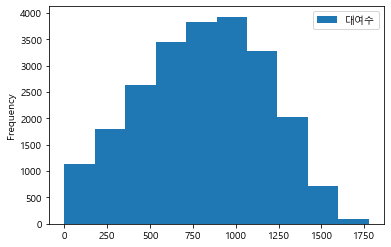

In [9]:
bike_rent_counts.plot.hist()

<AxesSubplot:ylabel='Frequency'>

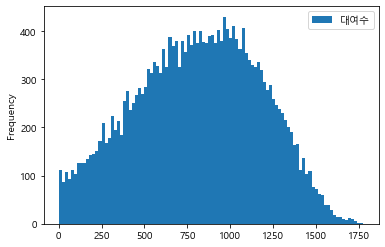

In [10]:
# bin의 갯수를 늘려서 그려본다.
bike_rent_counts.plot.hist(bins=100)

<AxesSubplot:xlabel='대여수', ylabel='Density'>

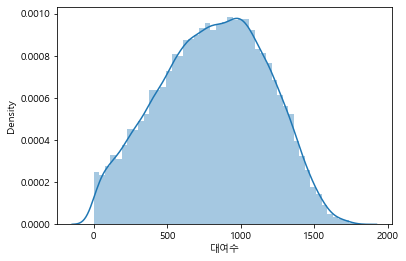

In [11]:
# 자전거 하나당 특정 기간동안 대여된 횟수
sns.distplot(bike_rent_counts["대여수"])

In [12]:
# 가장 많이 대여된 자전거의 대여이력
most_bike_df = rental_2019.loc[rental_2019['bike_no'] == bike_describe[2]]
most_bike_df.head()

,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,rental_distance
5556,SPB-19776,2019-01-01 17:01:24,1974,신도림2차e편한세상아파트 203동 앞,4,2019-01-01 17:06:33,1906,신도림역 1번 출구 앞,1,5,1080.0
7544,SPB-19776,2019-01-01 20:37:01,1906,신도림역 1번 출구 앞,1,2019-01-01 21:29:21,1908,해원리바파크 육교 밑,3,50,4700.0
10770,SPB-19776,2019-01-02 08:16:50,1908,해원리바파크 육교 밑,3,2019-01-02 08:30:42,1910,낙원교회 맞은편,4,13,2200.0
15480,SPB-19776,2019-01-02 15:46:06,1910,낙원교회 맞은편,4,2019-01-02 16:01:01,1957,구일고등학교 정문,9,14,2590.0
17790,SPB-19776,2019-01-02 17:42:00,1957,구일고등학교 정문,9,2019-01-02 18:29:17,1957,구일고등학교 정문,3,46,6870.0


In [13]:
most_bike_df['rental_loc_name'].value_counts()

뚝섬유원지역 1번출구 앞    14
안암로터리 버스정류장 앞    12
커먼그라운드           11
건국대학교 (입학정보관)    10
자양나들목            10
                 ..
서울시립대 정문 앞        1
용답역 1번 출구         1
왕십리역 11번 출구 앞     1
한양대후문역 부근         1
관악농협농산물백화점        1
Name: rental_loc_name, Length: 808, dtype: int64

In [14]:
rent_station = most_bike_df['rental_loc_name'].unique()
rent_station

array(['신도림2차e편한세상아파트 203동 앞', '신도림역 1번 출구 앞', '해원리바파크 육교 밑', '낙원교회 맞은편',
       '구일고등학교 정문', '고척스카이돔구장 광장', '고척근린공원 고척도서관 앞', '서부식자재마트 건너편',
       '등촌역 5번 출구 뒤', '성원2차 아파트', 'KB국민은행 염창역 지점 앞', '용문사 버스정류장',
       '목동사거리 버스정류장', 'IFC몰', '진미파라곤 앞', '구로구의회 앞', '여의도초교 앞', '롯데캐슬 앞',
       '롯데캐슬엠파이어 옆', '양평우림 이비즈센타 앞', '오목로 무중력지대 앞', '화광신문사 앞',
       '서울남부초등학교 옆', '동방1교', '신림역 5번출구', '미림여고입구 교차로', '삼성디지털프라자관악점',
       '신림동주민센터', '한신휴아파트 앞', '남구로역 5번 출입구 앞', '가리봉동주민센터',
       '홈플러스 시흥점 맞은편 다비치안경 앞', '서울신성초등학교', '봉림교 교통섬', '신림동 우방아파트',
       'LH서초3단지 301동 맞은편', '영동3교 북단(우성캐릭터 앞 보도)', '삼성역 5~6번 출구 사이',
       '대청역 1번출구  뒤', '송파역 2번 출구앞', '삼성역 3번 출구', '석촌호교차로 (스타벅스 앞)',
       '송파구청', '송파소방서 맞은편(성내4교)', '한성백제역 2번 출구', '서울체육고등학교 앞', '방이역 1번출구',
       '방이동 한양3차아파트 옆', '방이역 4번출구', '석촌역 2번출구', '석촌호수교차로(동호 팔각정 앞)',
       '잠실나루역 (2번 출구 쪽)', '석촌호수 서호사거리', '롯데월드타워(잠실역2번출구 쪽)', '송파파인타운 7단지',
       '복정역 2번출구 후문 (장지치안센터)', '위례중앙푸르지오 1단지 앞',
       '위례송파꿈에그린아파트24단지 앞 성벽 다리 밑', '가락시장역 3번 출구', '올림픽공

In [15]:
# 대여소명 앞에 들어간 공백을 제거합니다.
bike_move = []
for s in rent_station:
    bike_move.append(s.strip())
    
bike_move

['신도림2차e편한세상아파트 203동 앞',
 '신도림역 1번 출구 앞',
 '해원리바파크 육교 밑',
 '낙원교회 맞은편',
 '구일고등학교 정문',
 '고척스카이돔구장 광장',
 '고척근린공원 고척도서관 앞',
 '서부식자재마트 건너편',
 '등촌역 5번 출구 뒤',
 '성원2차 아파트',
 'KB국민은행 염창역 지점 앞',
 '용문사 버스정류장',
 '목동사거리 버스정류장',
 'IFC몰',
 '진미파라곤 앞',
 '구로구의회 앞',
 '여의도초교 앞',
 '롯데캐슬 앞',
 '롯데캐슬엠파이어 옆',
 '양평우림 이비즈센타 앞',
 '오목로 무중력지대 앞',
 '화광신문사 앞',
 '서울남부초등학교 옆',
 '동방1교',
 '신림역 5번출구',
 '미림여고입구 교차로',
 '삼성디지털프라자관악점',
 '신림동주민센터',
 '한신휴아파트 앞',
 '남구로역 5번 출입구 앞',
 '가리봉동주민센터',
 '홈플러스 시흥점 맞은편 다비치안경 앞',
 '서울신성초등학교',
 '봉림교 교통섬',
 '신림동 우방아파트',
 'LH서초3단지 301동 맞은편',
 '영동3교 북단(우성캐릭터 앞 보도)',
 '삼성역 5~6번 출구 사이',
 '대청역 1번출구  뒤',
 '송파역 2번 출구앞',
 '삼성역 3번 출구',
 '석촌호교차로 (스타벅스 앞)',
 '송파구청',
 '송파소방서 맞은편(성내4교)',
 '한성백제역 2번 출구',
 '서울체육고등학교 앞',
 '방이역 1번출구',
 '방이동 한양3차아파트 옆',
 '방이역 4번출구',
 '석촌역 2번출구',
 '석촌호수교차로(동호 팔각정 앞)',
 '잠실나루역 (2번 출구 쪽)',
 '석촌호수 서호사거리',
 '롯데월드타워(잠실역2번출구 쪽)',
 '송파파인타운 7단지',
 '복정역 2번출구 후문 (장지치안센터)',
 '위례중앙푸르지오 1단지 앞',
 '위례송파꿈에그린아파트24단지 앞 성벽 다리 밑',
 '가락시장역 3번 출구',
 '올림픽공원역 3번출구',
 '오륜사거리',
 '송파중학교 정문',
 '문정현대아파트 교차

# 9. 대여소별로 전체 대여/반납 , 오전오후 대여/반납 구하기

## 9.1 대여는 있는데 반납은 없는 대여소 or 반납은 있는데 대여는 없는곳 있는지 확인

In [85]:
A = rental_2019['rental_loc_name'].value_counts()
A.index

Index(['뚝섬유원지역 1번출구 앞', '여의나루역 1번출구 앞', '홍대입구역 2번출구 앞', '롯데월드타워(잠실역2번출구 쪽)',
       '봉림교 교통섬', '고속터미널역 8-1번, 8-2번 출구 사이', '건대입구역 사거리(롯데백화점)',
       '마곡나루역 5번출구 뒤편', '안암로터리 버스정류장 앞', '마포구민체육센터 앞',
       ...
       '명지대학교 학생회관', '개포래미안포레스트아파트 107동 앞', '이동정비', '강일동 에너지 마루',
       '서울월드컵경기장 테스트', '래미안강남포레스트 입구 (보도육교)', '세종대학교(학술정보원)', '시설2', '상암단말정비',
       '시스템관리팀'],
      dtype='object', length=1586)

In [86]:
B = rental_2019['return_loc_name'].value_counts()

In [87]:
only_rent=[]
for i in A.index:
    if i not in B.index:
        only_rent.append(i)
print(only_rent)

[]


In [88]:
only_return=[]
for i in B.index:
    if i not in A.index:
        only_return.append(i)
print(only_return)

['위트콤']


## 9.2 대여소별로 대여/반납 추출

In [89]:
rental_2019['rental_loc_name'].value_counts()

뚝섬유원지역 1번출구 앞          102117
여의나루역 1번출구 앞           100733
홍대입구역 2번출구 앞            71877
롯데월드타워(잠실역2번출구 쪽)       71099
봉림교 교통섬                 70000
                        ...  
래미안강남포레스트 입구 (보도육교)         6
세종대학교(학술정보원)                6
시설2                         4
상암단말정비                      4
시스템관리팀                      3
Name: rental_loc_name, Length: 1586, dtype: int64

In [90]:
rental_2019['return_loc_name'].value_counts()

뚝섬유원지역 1번출구 앞        113867
여의나루역 1번출구 앞          98017
홍대입구역 2번출구 앞          86321
롯데월드타워(잠실역2번출구 쪽)     71469
봉림교 교통섬               71395
                      ...  
상암단말정비                    6
시설2                       4
시스템관리팀                    3
세종대학교(학술정보원)              3
위트콤                       1
Name: return_loc_name, Length: 1587, dtype: int64

In [91]:
rent_count = rental_2019.groupby('rental_loc_name')['rental_loc_name'].count()
rent_count

rental_loc_name
(구)신한은행 중랑교지점      10086
(구)합정동 주민센터         8494
3호선 매봉역 3번출구앞      12548
419민주묘지역           12226
8삼호@ 2동 ( 간선도로)     3293
                   ...  
휘봉고등학교 앞            4353
흑석역 1번출구           28266
흑석역 4번출구            4721
흑석한강푸르지오 106동앞      2071
희성오피앙               6811
Name: rental_loc_name, Length: 1586, dtype: int64

In [92]:
len(rent_count)

1586

In [93]:
return_count = rental_2019.groupby('return_loc_name')['return_loc_name'].count()
return_count

return_loc_name
(구)신한은행 중랑교지점      11712
(구)합정동 주민센터         8824
3호선 매봉역 3번출구앞      12857
419민주묘지역           12686
8삼호@ 2동 ( 간선도로)     2272
                   ...  
휘봉고등학교 앞            4161
흑석역 1번출구           30817
흑석역 4번출구            4887
흑석한강푸르지오 106동앞      1583
희성오피앙               7190
Name: return_loc_name, Length: 1587, dtype: int64

In [94]:
len(return_count)

1587

In [95]:
both_exist = []
for i in rent_count.index:
    if i in return_count.index:
        both_exist.append(i)
len(both_exist) 
# 겹치는 대여소 총 2183개

1586

In [96]:
# 대여 대여소에만 속하는 3개는 제거
for i in return_count.index:
    if i in ['위트콤']:
        return_count.drop(i, inplace=True)

In [97]:
print(len(rent_count))
print(len(return_count))

1586
1586


## 9.3 대여소별로 오전/오후 대여/반납 횟수 추출

In [98]:
rent_ampm_count = rental_2019.groupby('rental_loc_name')['rental_AM/PM'].value_counts(dropna=False)

In [99]:
rent_ampm_count

rental_loc_name  rental_AM/PM
(구)신한은행 중랑교지점    PM              6015
                 AM              4071
(구)합정동 주민센터      PM              4954
                 AM              3540
3호선 매봉역 3번출구앞    PM              9025
                                 ... 
흑석역 4번출구         AM              1676
흑석한강푸르지오 106동앞   PM              1187
                 AM               884
희성오피앙            PM              4474
                 AM              2337
Name: rental_AM/PM, Length: 3170, dtype: int64

In [100]:
len(rent_ampm_count)

3170

In [101]:
return_ampm_count = rental_2019.groupby('return_loc_name')['return_AM/PM'].value_counts()

In [102]:
return_ampm_count

return_loc_name  return_AM/PM
(구)신한은행 중랑교지점    PM              7816
                 AM              3896
(구)합정동 주민센터      PM              6186
                 AM              2638
3호선 매봉역 3번출구앞    PM              8478
                                 ... 
흑석역 4번출구         AM              1801
흑석한강푸르지오 106동앞   PM              1160
                 AM               423
희성오피앙            PM              5310
                 AM              1880
Name: return_AM/PM, Length: 3171, dtype: int64

In [103]:
len(return_ampm_count.values)

3171

In [104]:
rent_ampm_count = rent_ampm_count.unstack()
rent_ampm_count

rental_AM/PM,AM,PM
rental_loc_name,,
(구)신한은행 중랑교지점,4071.0,6015.0
(구)합정동 주민센터,3540.0,4954.0
3호선 매봉역 3번출구앞,3523.0,9025.0
419민주묘지역,3695.0,8531.0
8삼호@ 2동 ( 간선도로),960.0,2333.0
...,...,...
휘봉고등학교 앞,1405.0,2948.0
흑석역 1번출구,5697.0,22569.0
흑석역 4번출구,1676.0,3045.0


In [105]:
rent_ampm_count.fillna(0, inplace=True)

In [106]:
return_ampm_count = return_ampm_count.unstack()
return_ampm_count

return_AM/PM,AM,PM
return_loc_name,,
(구)신한은행 중랑교지점,3896.0,7816.0
(구)합정동 주민센터,2638.0,6186.0
3호선 매봉역 3번출구앞,4379.0,8478.0
419민주묘지역,4097.0,8589.0
8삼호@ 2동 ( 간선도로),867.0,1405.0
...,...,...
휘봉고등학교 앞,1520.0,2641.0
흑석역 1번출구,5978.0,24839.0
흑석역 4번출구,1801.0,3086.0


In [107]:
# 대여 대여소에만 속하는 3개는 제거
for i in return_ampm_count.index:
    if i in ['위트콤']:
        return_ampm_count.drop(i, inplace=True)

In [108]:
return_ampm_count.fillna(0, inplace=True)

In [109]:
print(len(rent_ampm_count))
print(len(return_ampm_count))

1586
1586


## 9.4 대여소별 대여/반납 , 오전대여/오후대여, 오전반납/오후반납 데이터프레임 생성

In [110]:
# 대여소별로 대여횟수 반납횟수 데이터프레임 생성
#rent_return = pd.DataFrame({'대여소명': both_exist, '대여횟수': rent_count.values, '반납횟수':return_count.values, '오전대여': rent_ampm_count.values[0:-2:2], '오후대여': rent_ampm_count.values[1:-1:2], '오전반납': return_ampm_count.values[0:-2:2], '오후반납': return_ampm_count.values[1:-1:2]})
rent_return = pd.DataFrame({'대여소명': both_exist, '대여횟수': rent_count.values, '반납횟수':return_count.values, 
                            '오전대여': [int(rent_ampm_count.values[i][0]) for i in range(len(rent_ampm_count))], 
                            '오후대여': [int(rent_ampm_count.values[i][1]) for i in range(len(rent_ampm_count))], 
                            '오전반납': [int(return_ampm_count.values[i][0]) for i in range(len(return_ampm_count))], 
                            '오후반납': [int(return_ampm_count.values[i][1]) for i in range(len(return_ampm_count))]})

In [111]:
rent_return

,대여소명,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
0,(구)신한은행 중랑교지점,10086,11712,4071,6015,3896,7816
1,(구)합정동 주민센터,8494,8824,3540,4954,2638,6186
2,3호선 매봉역 3번출구앞,12548,12857,3523,9025,4379,8478
3,419민주묘지역,12226,12686,3695,8531,4097,8589
4,8삼호@ 2동 ( 간선도로),3293,2272,960,2333,867,1405
...,...,...,...,...,...,...,...
1581,휘봉고등학교 앞,4353,4161,1405,2948,1520,2641
1582,흑석역 1번출구,28266,30817,5697,22569,5978,24839
1583,흑석역 4번출구,4721,4887,1676,3045,1801,3086
1584,흑석한강푸르지오 106동앞,2071,1583,884,1187,423,1160


In [112]:
rent_return_2 = rent_return.set_index('대여소명')
rent_return_2

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
(구)신한은행 중랑교지점,10086,11712,4071,6015,3896,7816
(구)합정동 주민센터,8494,8824,3540,4954,2638,6186
3호선 매봉역 3번출구앞,12548,12857,3523,9025,4379,8478
419민주묘지역,12226,12686,3695,8531,4097,8589
8삼호@ 2동 ( 간선도로),3293,2272,960,2333,867,1405
...,...,...,...,...,...,...
휘봉고등학교 앞,4353,4161,1405,2948,1520,2641
흑석역 1번출구,28266,30817,5697,22569,5978,24839
흑석역 4번출구,4721,4887,1676,3045,1801,3086


In [113]:
top20_rent = rent_return_2.sort_values(by=['대여횟수'], ascending=False).head(20)
top20_rent

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
뚝섬유원지역 1번출구 앞,102117,113867,16997,85120,22406,91461
여의나루역 1번출구 앞,100733,98017,19302,81431,14265,83752
홍대입구역 2번출구 앞,71877,86321,16650,55227,34711,51610
롯데월드타워(잠실역2번출구 쪽),71099,71469,11947,59152,21866,49603
봉림교 교통섬,70000,71395,18661,51339,18096,53299
"고속터미널역 8-1번, 8-2번 출구 사이",66097,69998,9903,56194,11304,58694
건대입구역 사거리(롯데백화점),60100,62895,12392,47708,14722,48173
마곡나루역 5번출구 뒤편,54597,56363,17292,37305,21752,34611
안암로터리 버스정류장 앞,54307,60610,14472,39835,22652,37958


both = 0

for i in top20_rent.index:
    if i in top20_return.index:
        both += 1
print(both)
# 20개 중에서 17개가 일치함 

In [115]:
top20_return = rent_return_2.sort_values(by=['반납횟수'], ascending=False).head(20)
top20_return

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
뚝섬유원지역 1번출구 앞,102117,113867,16997,85120,22406,91461
여의나루역 1번출구 앞,100733,98017,19302,81431,14265,83752
홍대입구역 2번출구 앞,71877,86321,16650,55227,34711,51610
롯데월드타워(잠실역2번출구 쪽),71099,71469,11947,59152,21866,49603
봉림교 교통섬,70000,71395,18661,51339,18096,53299
"고속터미널역 8-1번, 8-2번 출구 사이",66097,69998,9903,56194,11304,58694
건대입구역 사거리(롯데백화점),60100,62895,12392,47708,14722,48173
마포구민체육센터 앞,53299,61739,11092,42207,10984,50755
안암로터리 버스정류장 앞,54307,60610,14472,39835,22652,37958


In [116]:
top20_rent = rent_return_2.sort_values(by=['대여횟수'], ascending=True).head(20)
top20_rent

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
시스템관리팀,3,3,0,3,0,3
상암단말정비,4,6,2,2,3,3
시설2,4,4,1,3,1,3
세종대학교(학술정보원),6,3,0,6,0,3
래미안강남포레스트 입구 (보도육교),6,13,2,4,5,8
서울월드컵경기장 테스트,20,18,6,14,7,11
강일동 에너지 마루,21,24,1,20,18,6
이동정비,28,57,11,17,26,31
개포래미안포레스트아파트 107동 앞,36,38,23,13,22,16


In [117]:
top20_return = rent_return_2.sort_values(by=['반납횟수'], ascending=True).head(20)
top20_return

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
시스템관리팀,3,3,0,3,0,3
세종대학교(학술정보원),6,3,0,6,0,3
시설2,4,4,1,3,1,3
상암단말정비,4,6,2,2,3,3
래미안강남포레스트 입구 (보도육교),6,13,2,4,5,8
서울월드컵경기장 테스트,20,18,6,14,7,11
정릉동 교통광장,106,21,62,44,8,13
강일동 에너지 마루,21,24,1,20,18,6
명지대학교 학생회관,50,37,13,37,12,25


In [118]:
top20_am_rent = rent_return_2.sort_values(by=['오전대여'], ascending=False).head(20)
top20_am_rent

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
여의나루역 1번출구 앞,100733,98017,19302,81431,14265,83752
봉림교 교통섬,70000,71395,18661,51339,18096,53299
마곡나루역 5번출구 뒤편,54597,56363,17292,37305,21752,34611
뚝섬유원지역 1번출구 앞,102117,113867,16997,85120,22406,91461
홍대입구역 2번출구 앞,71877,86321,16650,55227,34711,51610
안암로터리 버스정류장 앞,54307,60610,14472,39835,22652,37958
동방1교,47282,48614,14381,32901,13419,35195
대방역6번출구,29335,28359,13666,15669,5397,22962
양천향교역 7번출구앞,44518,44179,13638,30880,12939,31240


In [119]:
top20_pm_rent = rent_return_2.sort_values(by=['오후대여'], ascending=False).head(20)
top20_pm_rent

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
뚝섬유원지역 1번출구 앞,102117,113867,16997,85120,22406,91461
여의나루역 1번출구 앞,100733,98017,19302,81431,14265,83752
롯데월드타워(잠실역2번출구 쪽),71099,71469,11947,59152,21866,49603
"고속터미널역 8-1번, 8-2번 출구 사이",66097,69998,9903,56194,11304,58694
홍대입구역 2번출구 앞,71877,86321,16650,55227,34711,51610
봉림교 교통섬,70000,71395,18661,51339,18096,53299
건대입구역 사거리(롯데백화점),60100,62895,12392,47708,14722,48173
마포구민체육센터 앞,53299,61739,11092,42207,10984,50755
신도림역 1번 출구 앞,50484,49484,10143,40341,13479,36005


In [120]:
top20_am_return = rent_return_2.sort_values(by=['오전반납'], ascending=False).head(20)
top20_am_return

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
홍대입구역 2번출구 앞,71877,86321,16650,55227,34711,51610
안암로터리 버스정류장 앞,54307,60610,14472,39835,22652,37958
뚝섬유원지역 1번출구 앞,102117,113867,16997,85120,22406,91461
롯데월드타워(잠실역2번출구 쪽),71099,71469,11947,59152,21866,49603
마곡나루역 5번출구 뒤편,54597,56363,17292,37305,21752,34611
봉림교 교통섬,70000,71395,18661,51339,18096,53299
구로디지털단지역 앞,42871,43362,13178,29693,17082,26280
태평양물산빌딩,23918,27129,2998,20920,16588,10541
신대방역 2번 출구,43015,45078,12480,30535,16537,28541


In [121]:
top20_pm_return = rent_return_2.sort_values(by=['오후반납'], ascending=False).head(20)
top20_pm_return

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
뚝섬유원지역 1번출구 앞,102117,113867,16997,85120,22406,91461
여의나루역 1번출구 앞,100733,98017,19302,81431,14265,83752
"고속터미널역 8-1번, 8-2번 출구 사이",66097,69998,9903,56194,11304,58694
봉림교 교통섬,70000,71395,18661,51339,18096,53299
홍대입구역 2번출구 앞,71877,86321,16650,55227,34711,51610
마포구민체육센터 앞,53299,61739,11092,42207,10984,50755
롯데월드타워(잠실역2번출구 쪽),71099,71469,11947,59152,21866,49603
건대입구역 사거리(롯데백화점),60100,62895,12392,47708,14722,48173
CJ 드림시티,44581,56184,11955,32626,15198,40986


<AxesSubplot:xlabel='오후대여', ylabel='Density'>

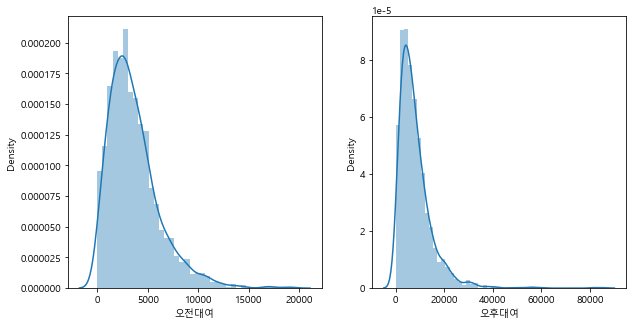

In [122]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(rent_return_2['오전대여'], ax=ax[0])
sns.distplot(rent_return_2['오후대여'], ax=ax[1])

<AxesSubplot:xlabel='오후대여'>

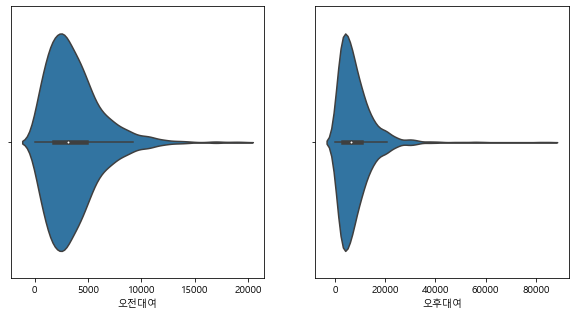

In [123]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.violinplot(rent_return_2['오전대여'], ax=ax[0])
sns.violinplot(rent_return_2['오후대여'], ax=ax[1])

In [124]:
rent_return_2.loc['신도림역 1번 출구 앞']

대여횟수    50484
반납횟수    49484
오전대여    10143
오후대여    40341
오전반납    13479
오후반납    36005
Name: 신도림역 1번 출구 앞, dtype: int64

In [125]:
# 이런식으로 대여/반납 차이 많이 나는곳 찾으면 될지?
A = rent_return_2.대여횟수[rent_return_2.대여횟수 > rent_return_2.반납횟수 *3]

In [126]:
A.index

Index(['광진유진스웰', '남태령역 2번출구', '논골사거리(금호도서관 입구)', '만해공원', '면목 대원칸타빌아파트',
       '방배래미안아트힐 101동앞', '서울시립대 앞', '신당 래미안 버스정류장', '신당 레미안 버스정류장',
       '신동아럭스빌아파트 앞', '연가초등학교 옆', '왕십리 자이아파트', '정릉동 교통광장', '탑성마을입구'],
      dtype='object', name='대여소명')

In [127]:
B = rent_return_2.반납횟수[rent_return_2.대여횟수 > rent_return_2.반납횟수 *3]

<AxesSubplot:xlabel='대여소명', ylabel='반납횟수'>

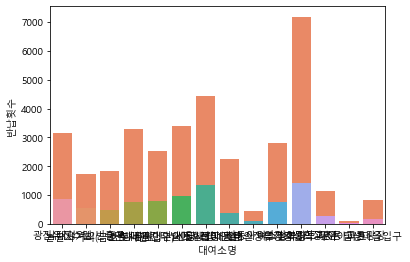

In [128]:
sns.barplot(data=rental_2019_month, x=A.index, y=A, color='coral')
sns.barplot(data=rental_2019_month, x=B.index, y=B)

In [129]:
# 이런식으로 대여/반납 차이 많이 나는곳 찾으면 될지?
rent_return_2.대여횟수[rent_return_2.대여횟수 *2 < rent_return_2.반납횟수]

대여소명
래미안강남포레스트 입구 (보도육교)      6
영남주차장 정비센터             109
이동정비                    28
Name: 대여횟수, dtype: int64

# 10. 그래프 시각화

## 10.1 rental_2021

In [130]:
rental_2019.head()

,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,...,rental_AM/PM,return_YMD,return_year,return_month,return_day,return_hour,return_minute,return_dow,return_AM/PM,rent_return_same_loc
0,SPB-10632,2019-01-01 00:00:44,1421,신내역 4번출구,3,2019-01-01 00:03:53,1420,신내어울공원 앞,13,2,...,AM,2019-01-01,2019,1,1,0,3,1,AM,False
1,SPB-10957,2019-01-01 00:02:16,1408,먹골역 6번출구 앞,3,2019-01-01 00:07:07,1433,중화역 2번출구,4,4,...,AM,2019-01-01,2019,1,1,0,7,1,AM,False
2,SPB-16067,2019-01-01 00:04:12,347,동대문역사문화공원역 9번출구 앞,17,2019-01-01 00:07:07,387,훈련원공원주차장 앞,1,2,...,AM,2019-01-01,2019,1,1,0,7,1,AM,False
3,SPB-17170,2019-01-01 00:03:09,615,용두동 래미안허브리츠아파트 앞,4,2019-01-01 00:07:27,612,시립동부병원 앞 사거리,14,3,...,AM,2019-01-01,2019,1,1,0,7,1,AM,False
4,SPB-14130,2019-01-01 00:01:44,1177,수명중?고교,7,2019-01-01 00:08:09,1152,마곡역교차로,1,5,...,AM,2019-01-01,2019,1,1,0,8,1,AM,False


In [131]:
rental_2019[['rental_loc_no', 'rental_loc_name']].value_counts(ascending=True)

rental_loc_no  rental_loc_name    
9999           시스템관리팀                      3
9996           시설2                         4
99998          상암단말정비                      4
3543           세종대학교(학술정보원)                6
2394           래미안강남포레스트 입구 (보도육교)         6
                                       ...  
2102           봉림교 교통섬                 70000
1210           롯데월드타워(잠실역2번출구 쪽)       71099
113            홍대입구역 2번출구 앞            71877
207            여의나루역 1번출구 앞           100733
502            뚝섬유원지역 1번출구 앞          102117
Length: 1586, dtype: int64

## rent_return_2

In [132]:
rent_return_2.head()

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
(구)신한은행 중랑교지점,10086,11712,4071,6015,3896,7816
(구)합정동 주민센터,8494,8824,3540,4954,2638,6186
3호선 매봉역 3번출구앞,12548,12857,3523,9025,4379,8478
419민주묘지역,12226,12686,3695,8531,4097,8589
8삼호@ 2동 ( 간선도로),3293,2272,960,2333,867,1405


from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plt.rc('font', family='NanumGothic')

sns.regplot(x='대여횟수',
           y='오전대여',
           data=rent_return_2,
           ax=ax1)

sns.regplot(x='대여횟수',
           y='오후대여',
           data=rent_return_2,
           ax=ax2)
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='오전대여', ylabel='Density'>

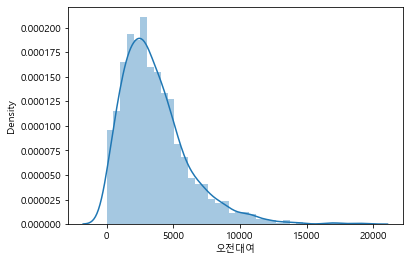

In [133]:
sns.distplot(rent_return_2['오전대여'])

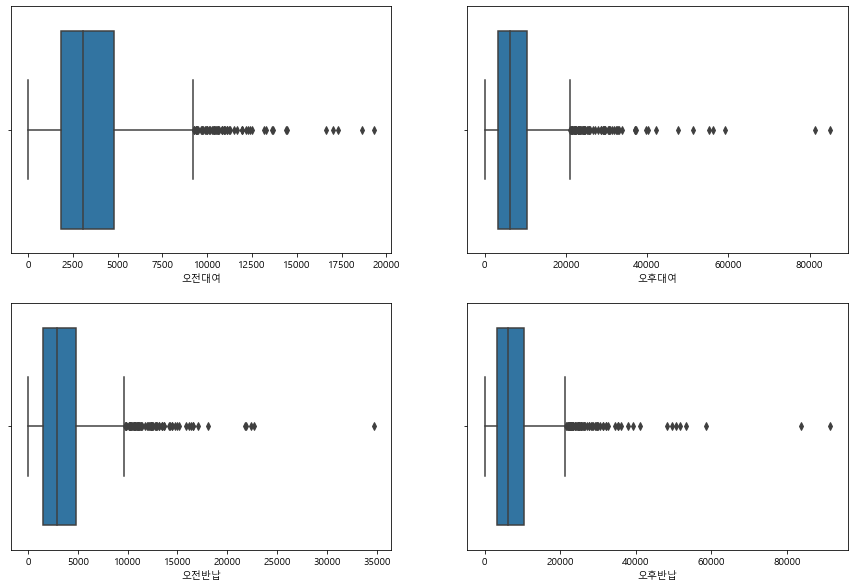

In [134]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(rent_return_2['오전대여'], ax=ax1)
sns.boxplot(rent_return_2['오후대여'], ax=ax2)
sns.boxplot(rent_return_2['오전반납'], ax=ax3)
sns.boxplot(rent_return_2['오후반납'], ax=ax4)

plt.show()

<AxesSubplot:ylabel='Frequency'>

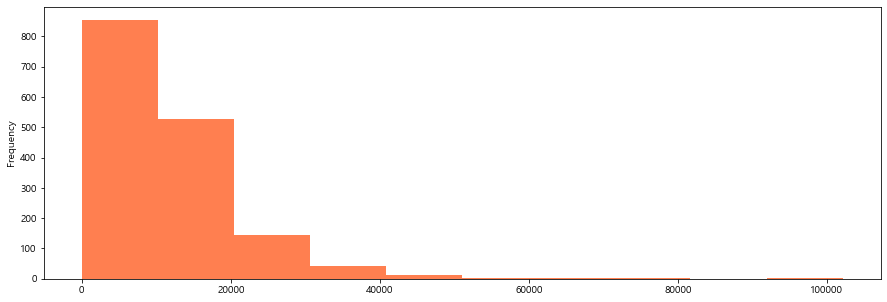

In [135]:
# 대여횟수
rent_return_2['대여횟수'].plot(kind='hist', bins=10, color='coral', figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

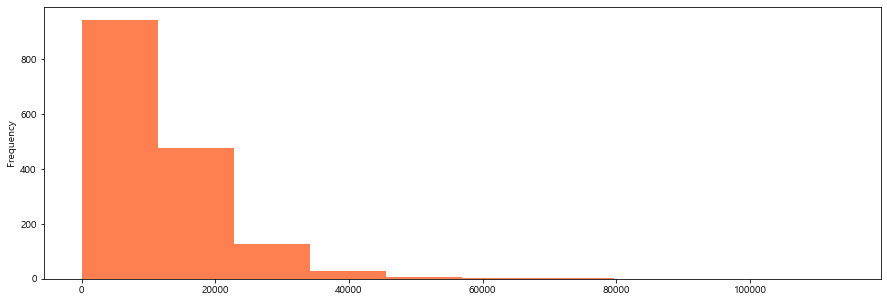

In [136]:
# 반납횟수
rent_return_2['반납횟수'].plot(kind='hist', bins=10, color='coral', figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

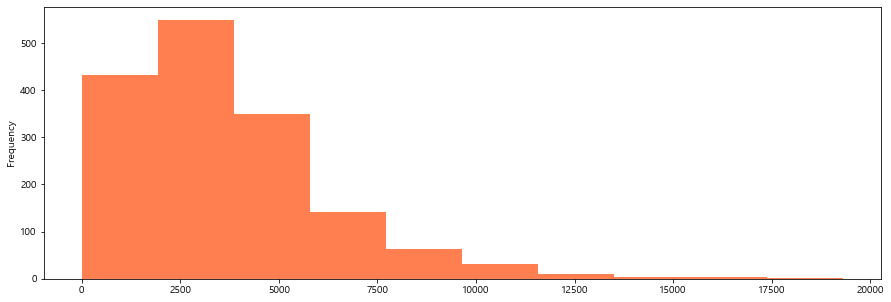

In [137]:
# 오전대여
rent_return_2['오전대여'].plot(kind='hist', bins=10, color='coral', figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

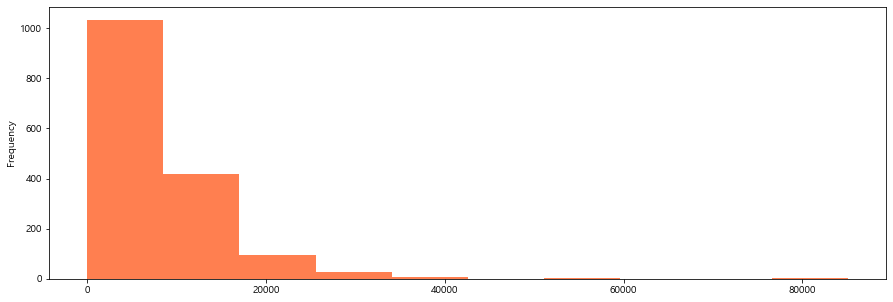

In [138]:
#  오후대여
rent_return_2['오후대여'].plot(kind='hist', bins=10, color='coral', figsize=(15,5))